# ML-3 Обучение с учителем. Классификация
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Введение в обучение без учителя. Базовая класетизация](#2)
- [3. Метрики](#3)
- [4. Иерархическая кластеризация](#4)
- [5. ЕМ-алгоритмы кластеризации](#5)
- [6. Спектральная классификация](#6)
- [7. Кластеризация на основе плотности](#7)
- [8. Визуализация результатов кластеризации](#8)
- [9. PCA и t-SNE, или зачем понижать размерность](#9)
- [10. Практика](#10)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

<img src=ml_4_img1.png width=800>

При обучении с учителем у нас всегда есть размеченные данные, т. е. **«правильные ответы»**. В данном случае мы предсказываем бинарные значения (например, уйдёт клиент от сотового оператора или нет) или точные значения (например, прибыль, которую получит магазин). Строить модели обучения с учителем вы уже умеете.

>Однако в реальной жизни данные зачастую приходят неразмеченными. Также не всегда есть возможность размечать их вручную, так как это может быть долго и/или дорого. Например, вы можете быть владельцем интернет-магазина и собирать данные о покупках, но в ваших данных никто не ставит отметки о лояльности клиентов. Или перед вами может стоять задача отделить рентгеновские снимки, на которых есть опухоль в лёгких, от снимков, на которых опухоли нет. Пока врач вручную не разметит данные, правильных ответов для обучения модели не будет.

Если размеченных данных нет, невозможно использовать подходы обучения с учителем. В таком случае на помощь приходят **методы обучения без учителя**.

### К обучению без учителя можно отнести:

* `Методы кластеризации`. Они позволяют разделить объекты на группы, внутри которых объекты максимально похожи друг на друга.
* `Методы понижения размерности`. С их помощью можно уменьшить число признаков, которые характеризуют объект. Обычно количество признаков уменьшают до двух-трёх для дальнейшей визуализации данных или использования при обучении моделей.
* `Методы ассоциации`. Они используются для того, чтобы найти правила и законы, по которым существует последовательность действий.

### КАКИЕ ПРОБЛЕМЫ МОЖНО РЕШАТЬ С ПОМОЩЬЮ МЕТОДОВ ОБУЧЕНИЯ БЕЗ УЧИТЕЛЯ?

Используя подходы, которые мы изучим в данном модуле, мы сможем лучше понимать данные, с которыми предстоит работать, например **разделять данные на группы**, которые схожи по каким-то признакам.

* Данные до кластеризации можно сравнить с фруктовым салатом, состав которого нам нужно понять. Используя методы кластеризации и визуализацию, мы можем понять, из чего состоят наши данные (наш «салат»):

<img src=ml_4_img2.png width=800>

* Если данных, с которыми вы работаете, много, то методы машинного обучения без учителя позволяют **уменьшить их объём**, убрав схожие данные и оставив только несколько представителей различных групп.

* Если разработанная модель плохо или долго обучается, причина может быть в том, что у объекта слишком много признаков. Методы уменьшения размерности помогают **уменьшить количество признаков**, которые характеризуют объект, и ускорить обучение модели.

Например, данные, которые изначально описывались тремя признаками (куб на рисунке ниже), мы можем описать и двумя признаками, спроецировав их на плоскость. Далее мы можем спроецировать полученный результат на одну ось и описывать объекты уже одним признаком:

<img src=ml_4_img3.png width=800>

* Некоторые методы кластеризации помогают **найти выбросы в данных**.

* Методы ассоциации позволяют **создавать шаблоны**. Это может помочь правильно расставить товары на полках в магазине или спрогнозировать продукты, которые могут купить вместе (например, если человек купил творог, то, возможно, ему будет нужна и сметана).

Таким образом, методы обучения без учителя решают весьма разнообразные задачи и могут помочь Data Science-специалисту в работе.

# 2. Введение в обучение без учителя. Базовая класетизация <a class="anchor" id=2></a>

[к содержанию](#0)

>Представьте, что вы работаете дата-сайентистом и получаете задачу по маркетинговому исследованию клиентов. Вам необходимо выделить группы покупателей по степени интереса к продукту и по сумме, которую они тратят.

### Как решить данную задачу?

**Обучение с учителем здесь не подходит**, так как у нас нет правильных ответов о степени заинтересованности покупателей в продукте.

Однако не спешите расстраиваться — на помощь придёт обучение без учителя, а именно кластеризация.

Кластеризация позволяет разбить объекты на группы, которые называются `кластерами`.

<img src=ml_4_img4.png>

Также у каждого кластера есть `центроид`.

`Центроид` — это центр масс кластера, или среднее значение координат объектов кластера.

<img src=ml_4_img5.png>

### Как найти этот `центроид`?

Допустим, у нас есть маленький кластер, состоящий из четырёх точек. Каждая точка описывается только одним свойством — `x1`, рост человека:

* Человек №1 - `x1 = 180`
* Человек №2 - `x2 = 170`
* Человек №3 - `x3 = 181`
* Человек №4 - `x4 = 160`

Тогда для нахождения центроида мы берём все значения по оси `x` и считаем среднее:

`x1(центроид кластера) = (180+170+181+160) / 4 = 172`

Что делать, если данные описываются двумя свойствами, например, рост (`x1`) и вес (`x2`)?

* Человек №1 - `x1 = 180` - `x2 = 70`
* Человек №2 - `x2 = 170` - `x2 = 60`
* Человек №3 - `x3 = 181` - `x2 = 65`
* Человек №4 - `x4 = 160` - `x2 = 45`

Для нахождения координат центроида мы последовательно находим:

`x1(центроид x1) = (180+170+181+160) / 4 = 172`
`x2(центроид x2) = (70+60+65+45) / 4 = 60`

**Таким образом, координаты центроида — (172, 60)**.


## АЛГОРИТМ `K-MEANS`

Рассмотрим один из наиболее популярных методов кластеризации — `k-means`.

Данный алгоритм был разработан ещё в 1950-х, но благодаря скорости своей работы он до сих пор остаётся востребованным.

>**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

<img src=ml_4_img6.png>


Только что мы рассмотрели, как работает алгоритм для одномерного случая (если есть только один признак, описывающий объект). Ниже вы можете увидеть, как работает алгоритм для двухмерного случая (когда объект описывается двумя признаками).

<img src=ml_4_gif.gif>

Если объект описывается тремя и более признаками, поиск кластеров идёт в `m`-мерном пространстве признаков. Однако такую работу алгоритма довольно сложно визуализировать.

Рассмотренный нами алгоритм был основан на центроидах: мы находили центры кластеров и присваивали объекты к ближайшему центроиду кластера.

На самом деле центры кластера можно определять разными способами. В зависимости от этого выделяется **несколько вариаций алгоритма `k-means`**:

<img src=ml_4_img7.png>

Теперь мы знаем, как работает алгоритм `k-means`, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации `k-means`, нам нужна библиотека `sklearn` и модуль KMeans.

Что необходимо для запуска?

* Обязательно задать количество кластеров, на которые необходимо разделить данные.
* Данные, т. е. параметры объектов (`x1`), которые мы будем передавать в виде матрицы наблюдений X.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

In [ ]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из `df2`, то мы просто воспользуемся методом `predict`:

In [ ]:
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

`n_clusters` — количество кластеров. По умолчанию — `8`.
`init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.
`n_init` — количество случайных инициализаций алгоритма `k-means`. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. По умолчанию `n_init = 10`.
`max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. По умолчанию — `300`.
`random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Теперь попробуем применить полученные знания на практике.

# Можно посмотреть файл `dst3-ml4-2_clusterization.ipynb`



In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

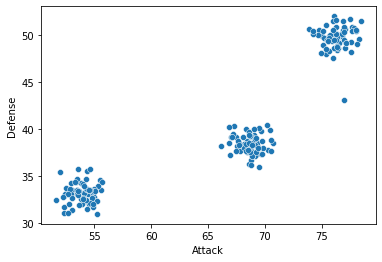

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(df.Attack, df.Defense)

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм `k-means`. При инициализации зададим параметры моделирования:

* `n_clusters` — количество кластеров;
* `init` — стратегия кластеризации;
* `n_init` — количество запусков алгоритма `k-means`;
* `random_state` — чтобы результаты воспроизводились от запуска к запуску.

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

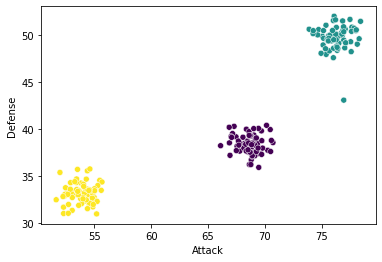

In [3]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

Как видим, «отделить» выброс от других данных не получается: `k-means` не умеет обрабатывать выбросы.

>В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в `n`-мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

В трёхмерном и другом `n`-мерном случае кластеризация запускается следующим образом:

In [4]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

## НЕДОСТАТКИ АЛГОРИТМА K-MEANS

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть `k`, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм `k-means` будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

Например, на картинке ниже зелёная точка справа — явный выброс. Но получилось так, что этот выброс находится ближе всего к зелёному кластеру, поэтому выброс был отнесён к нему. При подсчёте центроида для зелёного кластера появится искажение, так как выброс сильно на это повлияет:

<img src=ml_4_img8.png>

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

Например, если данные распределены, как на левом и среднем рисунках ниже, алгоритм `k-means` будет проводить кластеризацию некорректно и выделять два довольно странных кластера (синий и оранжевый). На правом рисунке изображены кластеры удлинённой формы, и для них `k-means` также отрабатывает плохо. Так происходит потому, что алгоритм ищет ближайших соседей и поэтому выделяет зелёным две нижних части двух разных кластеров, считая их ближайшими соседями.

<img src=ml_4_img9.png>

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.


# 3. Метрики <a class="anchor" id=3></a>

[к содержанию](#0)

# 4. Иерархическая кластеризация <a class="anchor" id=4></a>

[к содержанию](#0)

# 5. ЕМ-алгоритмы кластеризации <a class="anchor" id=5></a>

[к содержанию](#0)

# 6. Спектральная классификация <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Кластеризация на основе плотности <a class="anchor" id=7></a>

[к содержанию](#0)

# 8. Визуализация результатов кластеризации <a class="anchor" id=8></a>

[к содержанию](#0)

# 9. PCA и t-SNE, или зачем понижать размерность <a class="anchor" id=9></a>

[к содержанию](#0)

# 10. Практика <a class="anchor" id=10></a>

[к содержанию](#0)